In [24]:
!pip install ta

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: n

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df=pd.read_csv('/kaggle/input/esg-data/esg_data.csv')
df.head()

,Unnamed: 0,date,user,text,platform
0,0,2025-10-02 13:57:52+00:00,1777137644876529664,RT @MAGAVoice: BREAKING 🚨 Pete Hegseth has a m...,Twitter
1,1,2025-10-02 13:57:52+00:00,305184351,"RT @AdamBienkov: In other news, Kemi Badenoch'...",Twitter
2,2,2025-10-02 13:57:50+00:00,2385700638,"RT @chrisjollyhale: In the past 24 hours, Pope...",Twitter
3,3,2025-10-02 13:57:49+00:00,704780317761150976,@wesstreeting And its going to green energy fi...,Twitter
4,4,2025-10-02 13:57:47+00:00,1934364751800500224,RT @ChaudhryShankar: Received the highest “Mah...,Twitter


In [ ]:
import re
from bs4 import BeautifulSoup

def clean_text(text):
    if not isinstance(text, str):
        return text
    text = BeautifulSoup(text, "html.parser").get_text()
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002700-\U000027BF"  # dingbats
        u"\U0001F900-\U0001F9FF"  # supplemental symbols
        u"\U00002600-\U000026FF"  # misc symbols
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    return text
df['text'] = df['text'].apply(clean_text)
df.to_csv("/kaggle/working/social_media_data.csv", index=False)

/tmp/ipykernel_36/1649102202.py:7: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(text, "html.parser").get_text()


In [ ]:
df1=pd.read_csv('/kaggle/working/social_media_data.csv')
df1.head()

,Unnamed: 0,date,user,text,platform
0,0,2025-10-02 13:57:52+00:00,1777137644876529664,RT MAGAVoice BREAKING Pete Hegseth has a mess...,Twitter
1,1,2025-10-02 13:57:52+00:00,305184351,RT AdamBienkov In other news Kemi Badenochs pa...,Twitter
2,2,2025-10-02 13:57:50+00:00,2385700638,RT chrisjollyhale In the past 24 hours Pope Le...,Twitter
3,3,2025-10-02 13:57:49+00:00,704780317761150976,wesstreeting And its going to green energy fir...,Twitter
4,4,2025-10-02 13:57:47+00:00,1934364751800500224,RT ChaudhryShankar Received the highest Mahatm...,Twitter


In [ ]:
import re
from bs4 import BeautifulSoup

def clean_text(text):
    if not isinstance(text, str):
        return text
    text = BeautifulSoup(text, "html.parser").get_text()
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002700-\U000027BF"  # dingbats
        u"\U0001F900-\U0001F9FF"  # supplemental symbols
        u"\U00002600-\U000026FF"  # misc symbols
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    return text
df['text'] = df['text'].apply(clean_text)
df.to_csv("/kaggle/working/social_media_data.csv", index=False)

/tmp/ipykernel_36/1649102202.py:7: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(text, "html.parser").get_text()


In [ ]:
df1 = df1.dropna(subset=["text"])
df1["text"] = df1["text"].astype(str).str.strip() 
df1 = df1[df1["text"] != ""]

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
from bertopic import BERTopic
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
ner_tokenizer = AutoTokenizer.from_pretrained("Kansallisarkisto/finbert-ner")
ner_model = AutoModelForTokenClassification.from_pretrained("Kansallisarkisto/finbert-ner")
ner_pipeline = pipeline("ner", model=ner_model, tokenizer=ner_tokenizer, aggregation_strategy="simple")
df1["entities"] = df1["text"].apply(lambda x: ner_pipeline(x))

from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedder.encode(df1["text"].tolist(), show_progress_bar=True)
topic_model = BERTopic()
topics, _ = topic_model.fit_transform(df1["text"].tolist(), embeddings)
df1["topic"] = topics

analyzer = SentimentIntensityAnalyzer()
df1["sentiment"] = df1["text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

df1.to_csv("/kaggle/working/esg_sentiment_output.csv")

tokenizer_config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/496M [00:00<?, ?B/s]

Device set to use cuda:0


model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
df_esg=pd.read_csv('/kaggle/working/esg_sentiment_output.csv')

In [ ]:
import ast

# Function to safely parse and extract ORG entities
def extract_orgs(entities_str):
    orgs = []
    try:
        entities = ast.literal_eval(entities_str)  # Convert string → Python list
        for ent in entities:
            if isinstance(ent, dict) and ent.get("entity_group") == "ORG":
                orgs.append(ent.get("word"))
    except Exception:
        pass
    return orgs

# Apply function
df_esg["orgs"] = df_esg["entities"].apply(extract_orgs)

# Flatten and get unique organization names
unique_orgs = sorted({org for sublist in df_esg["orgs"] for org in sublist})

print("Unique organizations found:")
for org in unique_orgs:
    print("-", org)

Unique organizations found:
- ##G
- ##KER
- ##KU
- ##O
- ##ZR
- ##bor
- ##e
- ##j
- ##ment
- ##miller
- ##s
- ##to
- ##vis
- ##y
- AB
- AB SK
- ABBSiemensAlstom
- AI
- AMD
- ARK
- ARKK
- Advanced Micro Devices Inc
- Allegheny Technologies
- Amazon
- Antero Resources AR
- AppLovin
- Apple store
- Argonne
- Argonne National Lab
- Aurora
- BBC
- BLS said
- BP
- BUY
- BYDDY
- BYDDY Nio
- Berkshire Hathaway
- Bloom
- Bloomberg
- Breakthrough Energy Coalition
- BridgeBio Pharma BBIO
- Bureau of Labor
- Bureau of Labor Statistics
- CEQ
- CNBC
- Caesars Entertainment
- Canadatech
- Capital One Financial
- Cel
- Celsius Holdings CELH
- Chesapeake Energy
- China
- Climate Change
- Comp
- Cooper
- Corpor
- Council of Economic
- Crypto
- D
- DEALMAKER
- DNA
- DNATO
- DOEs
- DUK
- Daimler
- Dow Jones
- Dow Jones Industrial
- Druckenmillers
- Duke Energy
- Duquesne Family Office
- EPA
- EQT
- ESG
- EU
- EnergyX
- Exxon
- Exxon XOM
- FCC Thomas Built Buses
- Fox Factory
- GDP
- GM
- Google
- Grattan 

In [ ]:
import ast
import pandas as pd

def extract_orgs(entities_str):
    orgs = []
    try:
        entities = ast.literal_eval(entities_str)
        for ent in entities:
            if isinstance(ent, dict) and ent.get("entity_group") == "ORG":
                orgs.append(ent.get("word"))
    except Exception:
        pass
    return orgs

df_esg["orgs"] = df_esg["entities"].apply(extract_orgs)

company_to_ticker = {
    "Apple": "AAPL",
    "Apple store": "AAPL",
    "Amazon": "AMZN",
    "Microsoft": "MSFT",
    "Tesla": "TSLA",
    "Exxon": "XOM",
    "Exxon XOM": "XOM",
    "Intel": "INTC",
    "Intel Corp": "INTC",
    "Nvidia": "NVDA",
    "Nvidia Corp": "NVDA",
    "NVDA": "NVDA",
    "AMD": "AMD",
    "Advanced Micro Devices Inc": "AMD",
    "Google": "GOOG",
    "Alphabet": "GOOG",
    "BP": "BP",
    "Wells Fargo": "WFC",
    "Berkshire Hathaway": "BRK-B",
    "Caesars Entertainment": "CZR",
    "Roku": "ROKU",
    "Twilio TWLO": "TWLO",
    "Uber": "UBER",
    "Toyota": "TM",
    "Honda GM": "HMC",
    "Volkswagen": "VWAGY",
    "VW": "VWAGY",
    "Philip Morris": "PM",
    "Duke Energy": "DUK",
    "NextEra": "NEE",
    "NextEra Energy Res": "NEE",
    "NextEra Energy Capital Hol": "NEE",
    "MercadoLibre": "MELI",
    "BYDDY": "BYDDY",
    "Nio": "NIO",
    "Allegheny Technologies": "ATI",
    "Chesapeake Energy": "CHK",
    "Antero Resources AR": "AR",
    "Celsius Holdings CELH": "CELH",
    "AppLovin": "APP",
    "BridgeBio Pharma BBIO": "BBIO",
    "Teva Pharma": "TEVA",
    "Stanley": "SWK", 
    "Capital One Financial": "COF",
    "Fox Factory": "FOXF",
}
def map_orgs_to_ticker(orgs_list):
    for org in orgs_list:
        if org in company_to_ticker:
            return company_to_ticker[org]
    return None

df_esg["ticker"] = df_esg["orgs"].apply(map_orgs_to_ticker)

print(df_esg[["date", "text", "orgs", "ticker"]].head(20))

                         date  \
0   2025-09-17 19:16:30+00:00   
1   2025-09-17 19:16:28+00:00   
2   2025-09-17 19:16:28+00:00   
3   2025-09-17 19:16:25+00:00   
4   2025-09-17 19:16:22+00:00   
5   2025-09-17 19:16:18+00:00   
6   2025-09-17 19:16:03+00:00   
7   2025-09-17 19:15:52+00:00   
8   2025-09-17 19:15:51+00:00   
9   2025-09-17 19:15:51+00:00   
10  2025-09-17 19:15:44+00:00   
11  2025-09-17 19:15:41+00:00   
12  2025-09-17 19:15:38+00:00   
13  2025-09-17 19:15:35+00:00   
14  2025-09-17 19:15:30+00:00   
15  2025-09-17 19:15:15+00:00   
16  2025-09-17 19:15:14+00:00   
17  2025-09-17 19:15:13+00:00   
18  2025-09-17 19:15:06+00:00   
19  2025-09-17 19:15:06+00:00   

                                                 text  \
0   RT QuantaMagazine It is an incontrovertible fa...   
1   Simple Share Buttons httpstcolnZu06UIdg simple...   
2   Sparky8811 Rightwingnutts Sorry I was thinking...   
3   Cant believe man made climate change is affect...   
4   Farming  Tokenomi

In [39]:
!pip uninstall -y keras tensorflow
!pip install --upgrade tensorflow keras

Found existing installation: keras 3.12.0
Uninstalling keras-3.12.0:
  Successfully uninstalled keras-3.12.0
Found existing installation: tensorflow 2.20.0
Uninstalling tensorflow-2.20.0:
  Successfully uninstalled tensorflow-2.20.0
  Using cached tensorflow-2.20.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
Using cached tensorflow-2.20.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (620.6 MB)
Using cached keras-3.12.0-py3-none-any.whl (1.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, b

In [50]:
import yfinance as yf
import ta
import pandas as pd
import numpy as np

# Step 1: Load and combine the two ESG sentiment CSV files
df_esg1 = pd.read_csv('/kaggle/input/esg-outputs/esg_sentiment_output (1).csv')
df_esg2 = pd.read_csv('/kaggle/input/esg-outputs/esg_sentiment_output.csv')

print(f"\nFile 1 columns: {df_esg1.columns.tolist()}")
print(f"File 1 sample dates (first 5):")
if 'date' in df_esg1.columns:
    print(df_esg1['date'].head())
else:
    print("  ⚠ No 'date' column found in file 1")

print(f"\nFile 2 columns: {df_esg2.columns.tolist()}")
print(f"File 2 sample dates (first 5):")
if 'date' in df_esg2.columns:
    print(df_esg2['date'].head())
else:
    print("  ⚠ No 'date' column found in file 2")

# Combine the two ESG dataframes
df_esg_combined = pd.concat([df_esg1, df_esg2], ignore_index=True)

# Remove duplicate unnamed columns
cols_to_drop = [col for col in df_esg_combined.columns if 'Unnamed' in str(col) or col == '']
if cols_to_drop:
    df_esg_combined = df_esg_combined.drop(columns=cols_to_drop)

print(f"✓ Combined ESG data: {len(df_esg_combined)} total rows")
print(f"  - From file 1: {len(df_esg1)} rows")
print(f"  - From file 2: {len(df_esg2)} rows")
print(f"\nColumns: {df_esg_combined.columns.tolist()}")

# Convert date column to datetime (handling MIXED formats - ISO and Unix timestamps)
print("Converting mixed date formats (ISO strings and Unix timestamps)...")

def parse_mixed_dates(date_val):
    """Parse dates that could be either ISO format strings or Unix timestamps"""
    if pd.isna(date_val):
        return pd.NaT

    date_str = str(date_val)

    # Check if it's a Unix timestamp (numeric string or float)
    if date_str.replace('.', '', 1).replace('-', '', 1).isdigit():
        try:
            # Convert to float first, then to datetime (UTC timezone)
            timestamp = float(date_str)
            return pd.to_datetime(timestamp, unit='s', utc=True)
        except:
            pass

    # Try parsing as ISO format
    try:
        dt = pd.to_datetime(date_str)
        # Make timezone-aware if it isn't already
        if dt.tz is None:
            dt = dt.tz_localize('UTC')
        return dt
    except:
        return pd.NaT

# Apply the mixed parsing function
df_esg_combined['date'] = df_esg_combined['date'].apply(parse_mixed_dates)

# Check results
nat_count = df_esg_combined['date'].isna().sum()
if nat_count > 0:
    print(f"⚠ Warning: {nat_count} rows still have invalid dates after parsing")
    df_esg_combined = df_esg_combined.dropna(subset=['date'])
    print(f"  Remaining rows: {len(df_esg_combined)}")
else:
    print(f"✓ Successfully parsed all {len(df_esg_combined)} dates")

# Convert to timezone-naive for easier merging
df_esg_combined['date'] = df_esg_combined['date'].dt.tz_localize(None)
print(f"  Date range: {df_esg_combined['date'].min()} to {df_esg_combined['date'].max()}")

# Step 2: Extract unique tickers from entities column (if tickers are in entities)
# Note: Adjust this based on your actual data structure
# This assumes entities might contain ticker symbols
print(f"\nSample entities: {df_esg_combined['entities'].head()}")

# Step 3: Define function to get stock data with indicators
def get_stock_with_indicators(ticker, start="2018-01-01", end="2025-10-05"):
    """Download stock data and calculate technical indicators"""
    try:
        # Download historical OHLCV
        df = yf.download(ticker, start=start, end=end, interval="1d", progress=False)

        if df.empty:
            print(f"⚠ No data found for {ticker}")
            return None

        # Reset index so Date becomes a column
        df.reset_index(inplace=True)

        # Flatten column names if multi-level
        if isinstance(df.columns, pd.MultiIndex):
            df.columns = [col[0] if col[1] == '' else col[0] for col in df.columns.values]

        # Rename Date column if needed
        if 'Date' in df.columns:
            df["date"] = pd.to_datetime(df["Date"]).dt.date
        else:
            df["date"] = pd.to_datetime(df.index).dt.date

        # Ensure Close is 1D series
        if 'Close' not in df.columns:
            print(f"Available columns: {df.columns.tolist()}")
            return None
        close = df["Close"].squeeze()

        # Add technical indicators
        df["SMA_20"] = ta.trend.sma_indicator(close, window=20)
        df["SMA_50"] = ta.trend.sma_indicator(close, window=50)
        df["RSI_14"] = ta.momentum.rsi(close, window=14)
        df["MACD"] = ta.trend.macd(close)
        df["MACD_signal"] = ta.trend.macd_signal(close)

        # Add Bollinger Bands
        bollinger = ta.volatility.BollingerBands(close)
        df["BB_high"] = bollinger.bollinger_hband()
        df["BB_low"] = bollinger.bollinger_lband()

        # Add ticker column
        df["ticker"] = ticker

        print(f"✓ Downloaded data for {ticker}: {len(df)} days")

        return df[["date", "ticker", "Close", "SMA_20", "SMA_50", "RSI_14",
                   "MACD", "MACD_signal", "BB_high", "BB_low"]]

    except Exception as e:
        print(f"✗ Error downloading {ticker}: {e}")
        return None

# Step 4: Get stock data for tickers
# Replace with your actual tickers
unique_tickers = ["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN"]

dfs_stock = []
for t in unique_tickers:
    stock_df = get_stock_with_indicators(t)
    if stock_df is not None:
        dfs_stock.append(stock_df)

# Combine all stock data
if len(dfs_stock) == 0:
    print("\n✗ No stock data downloaded. Please check ticker symbols and try again.")
    df_stock_all = pd.DataFrame()
else:
    df_stock_all = pd.concat(dfs_stock, ignore_index=True)
    print(f"\n✓ Combined stock data: {len(df_stock_all)} rows across {len(dfs_stock)} tickers")

# Step 5: Merge ESG sentiment with stock data
if df_stock_all.empty:
    print("\n⚠ Skipping merge - no stock data available")
    df_final = df_esg_combined.copy()
else:
    # DEBUG: Check date ranges
    print("\n" + "="*60)
    print("DATE RANGE ANALYSIS")
    print("="*60)
    print(f"ESG data date range: {df_esg_combined['date'].min()} to {df_esg_combined['date'].max()}")
    print(f"Stock data date range: {df_stock_all['date'].min()} to {df_stock_all['date'].max()}")

    # Convert dates to same format for merging
    df_esg_combined['date_only'] = df_esg_combined['date'].dt.date
    df_stock_all['date_only'] = df_stock_all['date']

    print(f"\nESG unique dates: {df_esg_combined['date_only'].nunique()}")
    print(f"Stock unique dates: {df_stock_all['date_only'].nunique()}")

    # Find overlapping dates
    esg_dates = set(df_esg_combined['date_only'])
    stock_dates = set(df_stock_all['date_only'])
    overlap = esg_dates.intersection(stock_dates)
    print(f"Overlapping dates: {len(overlap)}")

    if len(overlap) > 0:
        print(f"Sample overlapping dates: {list(overlap)[:5]}")
    else:
        print("⚠ WARNING: No overlapping dates found!")
        print(f"Sample ESG dates: {list(esg_dates)[:5]}")
        print(f"Sample stock dates: {list(stock_dates)[:5]}")

    # Since ESG data doesn't have ticker info, we'll create a Cartesian product
    # This matches each ESG post with all stock data from the same date
    df_final = pd.merge(
        df_stock_all,
        df_esg_combined,
        on='date_only',
        how='inner',
        suffixes=('_stock', '_esg')
    )

    # Drop the helper date columns
    if not df_final.empty:
        df_final = df_final.drop(['date_only'], axis=1)

    print(f"\n✓ Final merged dataset: {len(df_final)} rows")
print(f"\nSample of merged data:")
print(df_final.head(10))

# Step 6: Save outputs
df_esg_combined.to_csv('esg_combined.csv', index=False)
print("\n✓ Files saved:")
print("  - esg_combined.csv (ESG sentiment data)")

if not df_stock_all.empty:
    df_stock_all.to_csv('stock_data_with_indicators.csv', index=False)
    df_final.to_csv('merged_esg_stock_data.csv', index=False)
    print("  - stock_data_with_indicators.csv (Stock + technical indicators)")
    print("  - merged_esg_stock_data.csv (Combined ESG + Stock data)")
else:
    print("  ⚠ Stock data files not saved (no data downloaded)")

# Step 7: Basic statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

print("\nESG Sentiment Statistics:")
print(df_esg_combined.groupby('platform')['sentiment'].describe())

if not df_stock_all.empty:
    print("\nStock Price Statistics by Ticker:")
    print(df_stock_all.groupby('ticker')['Close'].describe())

print("\nESG Topics Distribution:")
print(df_esg_combined['topic'].value_counts())



File 1 columns: ['Unnamed: 0.1', 'Unnamed: 0', 'date', 'user', 'text', 'platform', 'entities', 'topic', 'sentiment']
File 1 sample dates (first 5):
0    2025-10-02 13:57:52+00:00
1    2025-10-02 13:57:52+00:00
2    2025-10-02 13:57:50+00:00
3    2025-10-02 13:57:49+00:00
4    2025-10-02 13:57:47+00:00
Name: date, dtype: object

File 2 columns: ['Unnamed: 0.1', 'Unnamed: 0', 'date', 'user', 'text', 'platform', 'entities', 'topic', 'sentiment']
File 2 sample dates (first 5):
0    2025-09-17 19:16:30+00:00
1    2025-09-17 19:16:28+00:00
2    2025-09-17 19:16:28+00:00
3    2025-09-17 19:16:25+00:00
4    2025-09-17 19:16:22+00:00
Name: date, dtype: object
✓ Combined ESG data: 394 total rows
  - From file 1: 198 rows
  - From file 2: 196 rows

Columns: ['date', 'user', 'text', 'platform', 'entities', 'topic', 'sentiment']
Converting mixed date formats (ISO strings and Unix timestamps)...
✓ Successfully parsed all 394 dates
  Date range: 2015-02-05 16:41:26 to 2025-10-02 13:57:52

Sample ent

/tmp/ipykernel_38/2015051376.py:92: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, interval="1d", progress=False)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/tmp/ipykernel_38/2015051376.py:92: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, interval="1d", progress=False)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/t

✓ Downloaded data for TSLA: 1950 days
✓ Downloaded data for GOOGL: 1950 days
✓ Downloaded data for AMZN: 1950 days

✓ Combined stock data: 9750 rows across 5 tickers

DATE RANGE ANALYSIS
ESG data date range: 2015-02-05 16:41:26 to 2025-10-02 13:57:52
Stock data date range: 2018-01-02 to 2025-10-03

ESG unique dates: 98
Stock unique dates: 1950
Overlapping dates: 64
Sample overlapping dates: [datetime.date(2025, 9, 17), datetime.date(2020, 7, 30), datetime.date(2024, 10, 29), datetime.date(2025, 7, 16), datetime.date(2025, 10, 2)]

✓ Final merged dataset: 1630 rows

Sample of merged data:
   date_stock ticker      Close     SMA_20     SMA_50     RSI_14      MACD  \
0  2018-10-18   AAPL  51.220707  52.791801  52.195182  44.484868 -0.053115   
1  2018-10-18   AAPL  51.220707  52.791801  52.195182  44.484868 -0.053115   
2  2018-11-07   AAPL  49.781445  51.175297  52.256878  44.871830 -0.810139   
3  2018-11-07   AAPL  49.781445  51.175297  52.256878  44.871830 -0.810139   
4  2020-01-27  

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


  - stock_data_with_indicators.csv (Stock + technical indicators)
  - merged_esg_stock_data.csv (Combined ESG + Stock data)

SUMMARY STATISTICS

ESG Sentiment Statistics:
          count      mean       std     min     25%     50%      75%     max
platform                                                                    
Reddit    198.0  0.585764  0.569374 -0.9941  0.5346  0.8551  0.96760  0.9997
Twitter   196.0  0.123263  0.476932 -0.9169 -0.1572  0.0258  0.44965  0.8979

Stock Price Statistics by Ticker:
         count        mean         std        min         25%         50%  \
ticker                                                                      
AAPL    1950.0  131.470569   63.517769  33.832439   63.234211  141.234222   
AMZN    1950.0  137.513719   44.955378  59.450500   94.161247  137.541504   
GOOGL   1950.0  109.141156   45.397551  48.896263   63.097682  105.485458   
MSFT    1950.0  257.298652  120.871727  78.332191  142.531921  247.948814   
TSLA    1950.0  174.6660

In [51]:
# Save final outputs to Kaggle working directory
df_esg_combined.to_csv('/kaggle/working/esg_combined.csv', index=False)

if not df_stock_all.empty:
    df_stock_all.to_csv('/kaggle/working/stock_data_with_indicators.csv', index=False)
    df_final.to_csv('/kaggle/working/merged_esg_stock_data.csv', index=False)

print("✓ Files saved to /kaggle/working/")
print("  - esg_combined.csv")
if not df_stock_all.empty:
    print("  - stock_data_with_indicators.csv")
    print("  - merged_esg_stock_data.csv")


✓ Files saved to /kaggle/working/
  - esg_combined.csv
  - stock_data_with_indicators.csv
  - merged_esg_stock_data.csv


In [52]:
!pip install lightgbm xgboost

In [53]:
!pip install keras-tcn

In [54]:
# =========================================
# ESG Sentiment + Technical Indicators Model Comparison
# =========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# ------------------------------
# Load dataset
# ------------------------------
df = pd.read_csv("merged_esg_stock_data.csv", low_memory=False)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Encode categorical columns
le_entity = LabelEncoder()
le_topic = LabelEncoder()
df['entity_code'] = le_entity.fit_transform(df['entities'].astype(str))
df['topic_code'] = le_topic.fit_transform(df['topic'].astype(str))

# ------------------------------
# Train-test split for ML models
# ------------------------------
X = df[['entity_code', 'topic_code', 'sentiment']]
y = df['sentiment'].shift(-1).fillna(df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================================
# Random Forest
# =========================================
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)
print(f"Random Forest -> MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")

# =========================================
# LightGBM
# =========================================
!pip install lightgbm --quiet
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
pred_lgb = lgb_model.predict(X_test)

mse_lgb = mean_squared_error(y_test, pred_lgb)
r2_lgb = r2_score(y_test, pred_lgb)
print(f"LightGBM -> MSE: {mse_lgb:.4f}, R²: {r2_lgb:.4f}")

# =========================================
# XGBoost
# =========================================
!pip install xgboost --quiet
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, pred_xgb)
r2_xgb = r2_score(y_test, pred_xgb)
print(f"XGBoost -> MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")

# =========================================
# Sequence Creation for Deep Models
# =========================================
def create_sequence(df, seq_len=5):
    data = df[['sentiment', 'topic_code']].values
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_len):
        X_seq.append(data[i:i+seq_len])
        y_seq.append(data[i+seq_len][0])
    return np.array(X_seq), np.array(y_seq)

seq_len = 5
X_seq, y_seq = create_sequence(df, seq_len)
split = int(len(X_seq) * 0.8)
X_seq_train, X_seq_test = X_seq[:split], X_seq[split:]
y_seq_train, y_seq_test = y_seq[:split], y_seq[split:]

# =========================================
# BiLSTM
# =========================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

model_lstm = Sequential([
    Bidirectional(LSTM(32, return_sequences=False, input_shape=(seq_len, 2))),
    Dense(1, activation='linear')
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_seq_train, y_seq_train, epochs=10, batch_size=16, verbose=1)

pred_dl = model_lstm.predict(X_seq_test)
mse_dl = mean_squared_error(y_seq_test, pred_dl)
r2_dl = r2_score(y_seq_test, pred_dl)
print(f"BiLSTM -> MSE: {mse_dl:.4f}, R²: {r2_dl:.4f}")

# =========================================
# Temporal Convolutional Network (TCN)
# =========================================
!pip install keras-tcn --quiet
from tcn import TCN
from tensorflow.keras.optimizers import Adam

def build_tcn_model(seq_len, num_features, filters=32, kernel_size=2, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(TCN(nb_filters=filters, kernel_size=kernel_size, dropout_rate=dropout_rate, input_shape=(seq_len, num_features)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

model_tcn = build_tcn_model(seq_len=seq_len, num_features=2)
model_tcn.fit(X_seq_train, y_seq_train, epochs=20, batch_size=16, validation_split=0.2, verbose=1)

pred_tcn = model_tcn.predict(X_seq_test)
mse_tcn = mean_squared_error(y_seq_test, pred_tcn)
r2_tcn = r2_score(y_seq_test, pred_tcn)
print(f"TCN -> MSE: {mse_tcn:.4f}, R²: {r2_tcn:.4f}")

# =========================================
# Summary
# =========================================
print("\n Model Comparison Summary:")
print(f"Random Forest -> MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")
print(f"LightGBM      -> MSE: {mse_lgb:.4f}, R²: {r2_lgb:.4f}")
print(f"XGBoost       -> MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")
print(f"BiLSTM        -> MSE: {mse_dl:.4f}, R²: {r2_dl:.4f}")
print(f"TCN           -> MSE: {mse_tcn:.4f}, R²: {r2_tcn:.4f}")


Random Forest -> MSE: 0.1144, R²: 0.6516
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 1304, number of used features: 3
[LightGBM] [Info] Start training from score 0.264377
LightGBM -> MSE: 0.1227, R²: 0.6263
XGBoost -> MSE: 0.1112, R²: 0.6614
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3048
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2913
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2906
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2835
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2792
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2759
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2738
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2694
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2672
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2645
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
BiLSTM -> MSE: 0.2662, R²: 0.1931
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - loss: 26.3654 - val_loss: 0.9155
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3045 - val_loss: 0.7090
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2087 - val_loss: 0.4522
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1632 - val_loss: 0.3860
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7629 - val_loss: 0.3793
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3609 - val_loss: 0.3467
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2349 - val_loss: 0.3131
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9567 - val_loss: 0.3163
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9057 - val_loss: 0.2892
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8485 - val_loss: 0.3247
Epoch 11/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7748 - val_loss: 0.2808
Epoch 12/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6769 - val_loss: 0.27

In [55]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# define base model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# parameter grid (compact & effective)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# randomized search for speed
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=15,  # small but effective
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# run tuning
random_search.fit(X_train, y_train)

# best params & model
print("\nBest Parameters Found:")
print(random_search.best_params_)

best_xgb = random_search.best_estimator_

# evaluate on test
pred_xgb = best_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, pred_xgb)
r2_xgb = best_xgb.score(X_test, y_test)

print(f"\nTuned XGBoost MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")

Fitting 3 folds for each of 15 candidates, totalling 45 fits

Best Parameters Found:
{'subsample': 0.9, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9}

Tuned XGBoost MSE: 0.1129, R²: 0.6562



Predicted Sentiment for Next Week (simulated): 0.0768

 Weekly Sentiment Forecast (last few weeks):
                     week  actual_weekly_sentiment  predicted_sentiment
53  2025-08-25/2025-08-31                 0.557400             0.772364
54  2025-09-01/2025-09-07                 0.965200             0.594273
55  2025-09-15/2025-09-21                 0.016849             0.070185
56  2025-09-22/2025-09-28                 0.979700            -0.572548
57  2025-09-29/2025-10-05                 0.240607             0.274631

 Saved weekly_sentiment_forecast.csv successfully!
Model saved as best_sentiment_model_xgb.pkl


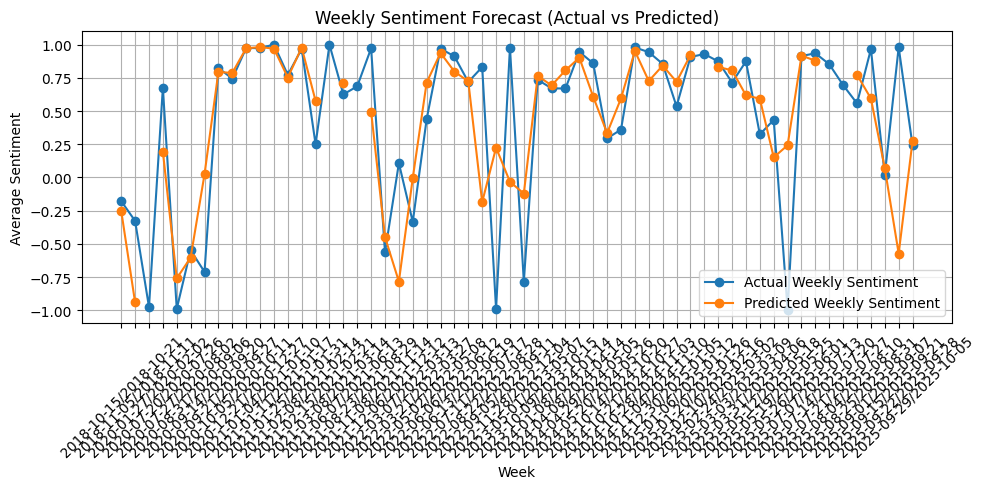

In [56]:
# =========================================
# Step 1: Weekly Sentiment Forecast (using tuned best_xgb)
# =========================================
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Use ESG date for sorting
df = df.sort_values(by='date_esg')

# Predict sentiment for the test set (as proxy for forecast)
df.loc[X_test.index, 'predicted_sentiment'] = pred_xgb

# Simulate next week sentiment prediction
latest_data = X.tail(1)   # last known observation
next_week_pred = best_xgb.predict(latest_data)
print(f"\nPredicted Sentiment for Next Week (simulated): {next_week_pred[0]:.4f}")

# Convert date_esg to datetime and group weekly
df['date_esg'] = pd.to_datetime(df['date_esg'], errors='coerce')
df['week'] = df['date_esg'].dt.to_period('W').astype(str)

weekly_forecast = (
    df.groupby('week')
      .agg({'sentiment': 'mean', 'predicted_sentiment': 'mean'})
      .reset_index()
      .rename(columns={'sentiment': 'actual_weekly_sentiment'})
)

# Display summary
print("\n Weekly Sentiment Forecast (last few weeks):")
print(weekly_forecast.tail())

# Save weekly forecast for dashboard
weekly_forecast.to_csv("weekly_sentiment_forecast.csv", index=False)
print("\n Saved weekly_sentiment_forecast.csv successfully!")

# Save tuned model
joblib.dump(best_xgb, "best_sentiment_model_xgb.pkl")
print("Model saved as best_sentiment_model_xgb.pkl")

# Optional: Plot Actual vs Predicted Sentiment
plt.figure(figsize=(10,5))
plt.plot(weekly_forecast['week'], weekly_forecast['actual_weekly_sentiment'], label='Actual Weekly Sentiment', marker='o')
plt.plot(weekly_forecast['week'], weekly_forecast['predicted_sentiment'], label='Predicted Weekly Sentiment', marker='o')
plt.xticks(rotation=45)
plt.title("Weekly Sentiment Forecast (Actual vs Predicted)")
plt.xlabel("Week")
plt.ylabel("Average Sentiment")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
